# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [3]:
# ===== Twoja implementacja tutaj =====
m = 50
n = 12

A, b = main.spare_matrix_Abt(m, n)


def method1():
    A_new, b_new = main.square_from_rectan(A, b)
    return np.linalg.solve(A_new, b_new)


x1 = method1()
time1 = %timeit -r 3 -n 3 -o method1()
mem1 = %memit -o method1()




def method2():
    return np.linalg.lstsq(A, b)

x2 = method2()[0]
time2 = %timeit -r 3 -n 3 -o method2()
mem2 = %memit -o method2()


def method3():
    A_Q, A_R = np.linalg.qr(A) # QR * x = b
    y = A_Q.T @ b # Rx = y
    
    return sp.linalg.solve_triangular(A_R, y)

x3 = method3()
time3 = %timeit -r 3 -n 3 -o method3()
mem3 = %memit -o method3()


def method4():
    A_U, A_S, A_V = np.linalg.svd(A, full_matrices= False) # USV * x = b

    new_b = A_U.T @ b # SV * x = new_b
    new_b = np.linalg.inv(np.diag(A_S)) @ new_b # V * x = new_b

    return A_V.T @ new_b

x4 = method4()
time4 = %timeit -r 3 -n 3 -o method4()
mem4 = %memit -o method4()


time = [time1, time2, time3, time4]
answers = [x1, x2, x3, x4]
memory = [mem1, mem2, mem3, mem4]


for x in answers:
    for val in x:
        print(f'{val:5.2f}', end=' ')
    print('\n')

norm = [main.residual_norm(A, answer, b) for answer in answers]



The slowest run took 6.83 times longer than the fastest. This could mean that an intermediate result is being cached.
25.2 μs ± 22.9 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 114.41 MiB, increment: 0.22 MiB
29.6 μs ± 11.2 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 114.62 MiB, increment: 0.00 MiB
The slowest run took 7.30 times longer than the fastest. This could mean that an intermediate result is being cached.
167 μs ± 120 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 129.48 MiB, increment: 0.00 MiB
54.4 μs ± 26.4 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
peak memory: 129.60 MiB, increment: 0.00 MiB
 1.00  0.00 -8.00  0.00 10.63  0.15 -6.11  0.77  0.70  0.74 -0.68  0.14 

 1.00 -0.00 -8.00 -0.00 10.67 -0.01 -5.65 -0.08  1.69  0.01 -0.37  0.09 

 1.00 -0.00 -8.00 -0.00 10.67 -0.01 -5.65 -0.08  1.69  0.01 -0.37  0.09 

 1.00 -0.00 -8.00 -0.00 10.67 -0.01 -5.65 -0.08  1.69  0.01 -0.37  0.09 



In [4]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.320e-07
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  25.2 μs ± 22.9 μs per loop (m
Druga metoda    :  29.6 μs ± 11.2 μs per loop (m
Trzecia metoda  :  167 μs ± 120 μs per loop (mea
Czwarta metoda  :  54.4 μs ± 26.4 μs per loop (m

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 114.41 MiB, increment: 0.22 MiB
Druga metoda    :  peak memory: 114.62 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 129.48 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 129.60 MiB, increment: 0.00 MiB


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [5]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

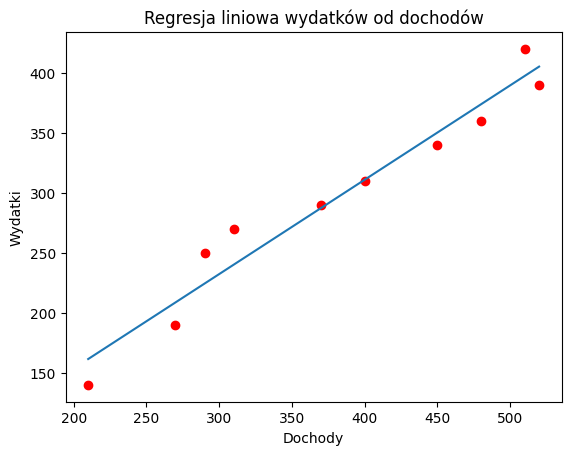

In [6]:
# ===== Twoja implementacja tutaj =====

y_mean = np.mean(w)
x_mean = np.mean(d)

numerator = 0.0
denumerator = 0.0

for di, wi in zip(d, w):
    numerator += (di - x_mean) * (wi - y_mean)
    denumerator += (di - x_mean) ** 2

Beta = numerator / denumerator
Alfa = y_mean - Beta * x_mean


func = lambda x : Alfa + Beta * x 
plt.figure()
plt.plot(d, w,'ro')
plt.plot(d, func(d))
plt.title("Regresja liniowa wydatków od dochodów")
plt.xlabel("Dochody")
plt.ylabel("Wydatki")


plt.show()


In [7]:
error = [abs(y - func(x)) for x,y in zip(d, w)]

for x, err in zip(d, error):
    print(f"Bład dla dochodu {x} wynosi {err}")

Bład dla dochodu 210 wynosi 21.577108319954704
Bład dla dochodu 270 wynosi 18.74303522523377
Bład dla dochodu 290 wynosi 25.53498913967323
Bład dla dochodu 310 wynosi 29.813013504580198
Bład dla dochodu 370 wynosi 2.647086599301133
Bład dla dochodu 400 wynosi 0.9358768533384136
Bład dla dochodu 450 wynosi 10.240815941070935
Bład dla dochodu 480 wynosi 13.823779393710481
Bład dla dochodu 510 wynosi 22.593257153649972
Bład dla dochodu 520 wynosi 15.267730663896543


W przypadku regresji liniowej, aktualne przybliżenie jest najlepszym jakie możemy uzyskać

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

In [8]:
# ===== Twoja implementacja tutaj =====
x1 = np.random.normal(0, 1,(100,1))
x2 = np.random.normal(0, 1, (100,1))
epsilon = np.random.normal(0, 1, (100,1))



y = 2 + x1 - 0.5 * x2 + epsilon

Model 1: $$y=b_0 * 1 + b_1 * x_1$$
$$
\left[
\begin{matrix}
    1       & x_1         \\
\end{matrix}
\right]
\left[
\begin{matrix}
    b_0   \\  b_1         
\end{matrix}
\right]
=
y
$$

Model 2: $$y=b_0 * 1 + b_1 * x_2$$

$$
\left[
\begin{matrix}
    1       & x_2         \\
\end{matrix}
\right]
\left[
\begin{matrix}
    b_0   \\  b_1         
\end{matrix}
\right]
=
y
$$

Model 3: $$y=b_0 * 1 + b_1 * x_1 + b_2 * x_2$$

$$
\left[
\begin{matrix}
    1       & x_1   & x_2         \\
\end{matrix}
\right]
\left[
\begin{matrix}
    b_0   \\  b_1   \\  b_2         
\end{matrix}
\right]
=
y
$$

Model 4: $$y=b_0 * 1 + b_1 * x_1 + b_2 * x_2 + b_3 * x_1x_2$$

$$
\left[
\begin{matrix}
    1       & x_1   & x_2   & x_3x_4         \\
\end{matrix}
\right]
\left[
\begin{matrix}
    b_0   \\  b_1   \\  b_2 \\  b_3         
\end{matrix}
\right]
=
y
$$


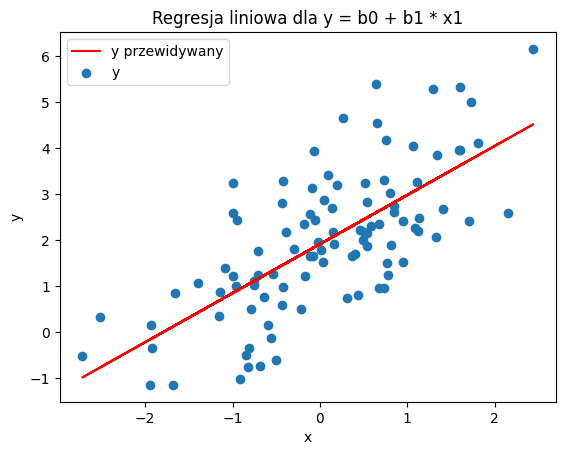

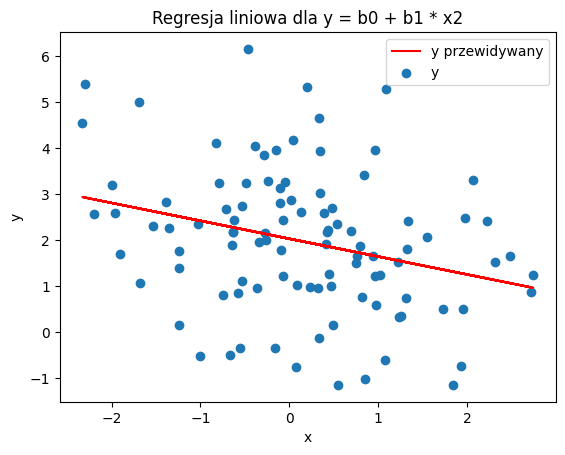

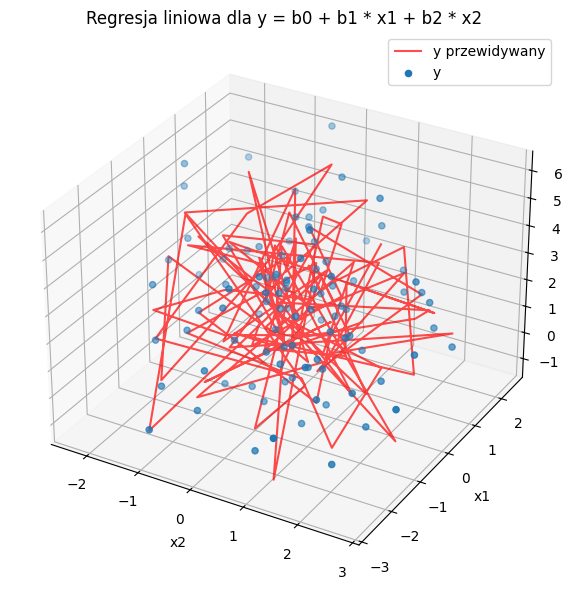

In [ ]:
#model 1
Z1 = np.concatenate((np.ones((100,1)), x1), axis = 1)
Q, R = np.linalg.qr(Z1) # QRb = y
B1 = sp.linalg.solve_triangular(R, Q.T @ y)
y_pred1 = Z1 @ B1


#model 2
Z2 = np.concatenate((np.ones((100,1)), x2), axis = 1)
Q, R = np.linalg.qr(Z2) # QRb = y
B2 = sp.linalg.solve_triangular(R, Q.T @ y)
y_pred2 = Z2 @ B2


#model 3
Z3 = np.concatenate((np.ones((100,1)), x1, x2), axis = 1)
Q, R = np.linalg.qr(Z3) # QRb = y
B3 = sp.linalg.solve_triangular(R, Q.T @ y)
y_pred3 = Z3 @ B3

x1_grid = np.linspace(np.min(x1), np.max(x1), 30)
x2_grid = np.linspace(np.min(x2), np.max(x2), 30)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
y_pred3_3d = B3[0] + B3[1]*X1 + B3[2]*X2



#model 4
Z4 = np.concatenate((np.ones((100,1)), x1, x2, x1*x2), axis = 1)
Q, R = np.linalg.qr(Z4) # QRb = y
B4 = sp.linalg.solve_triangular(R, Q.T @ y)
y_pred4 = Z4 @ B4






def draw(x, y, y_pred, title = ""):
    plt.figure()
    plt.plot(x,y_pred,"r", label = "y przewidywany")
    plt.scatter(x,y, label = "y")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

draw(x1,y,y_pred1,"Regresja liniowa dla y = b0 + b1 * x1")
draw(x2,y,y_pred2,"Regresja liniowa dla y = b0 + b1 * x2")


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_wireframe(X2, X1, y_pred3_3d, color='red', alpha=0.7, label='y przewidywany')

ax.scatter(x2, x1, y, label = 'y')
ax.set_xlabel("x2")
ax.set_ylabel("x1")
ax.set_zlabel("y")

ax.set_title("Regresja liniowa dla y = b0 + b1 * x1 + b2 * x2")
plt.legend()
fig.tight_layout()
plt.show()





---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)